# JavaScriptでのFFT計算を検証

[ndarray-fft](https://github.com/scijs/ndarray-fft)を使ったが、これが本当に使えるのか検証。  
* 50Hzのsin波(1024点)を生成し、ndarray-showでコンソール出力してx.tsvとして保存
* 生成したsin波をFFTし、結果を同様にy.tsvとして保存

を実行し、numpyで作った波/fft結果と比較する。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import math
%matplotlib inline

## JSでの結果を読み出す

タブで分かれているかと思ったがただのスペースだった(しかもスペース数は安定せず)。  
スペースで区切り、複数スペースがあるところはnullになってしまうのでdropnaで削除、ということをした。

とりあえずmatplotlibで描画してみると、ちゃんととれていることが分かる。

In [2]:
tmp = pd.read_table('x.tsv', delimiter=' ', header=None)
x = tmp.loc[0].dropna().reset_index(drop=True)
del tmp

E:\tool\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


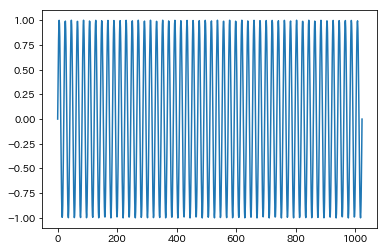

In [3]:
plt.plot(x)

In [4]:
tmp = pd.read_table('y.tsv', delimiter=' ', header=None)
y = tmp.loc[0].dropna().reset_index(drop=True)
del tmp

E:\tool\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


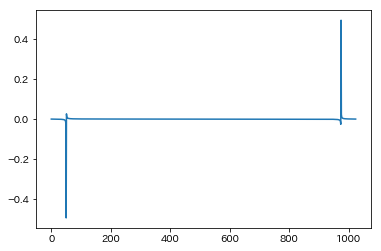

In [5]:
plt.plot(y)

## numpyの結果と比較

同様にnumpyを使って1024点のsin波を作り、比較してみる。

In [8]:
SAMPLING = 1024
t = np.arange(0, 1, 1 / SAMPLING)
x_p = np.cos(2*math.pi*50*t)

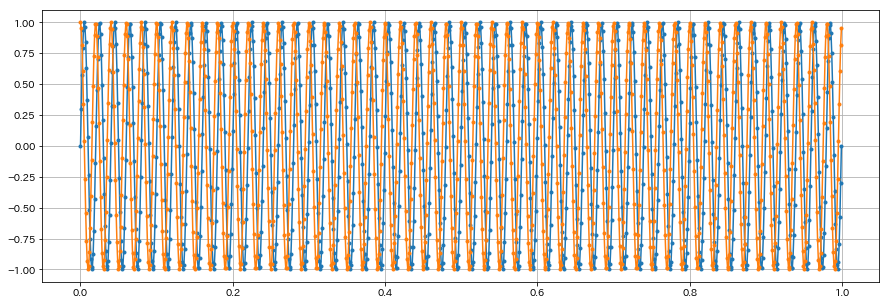

In [9]:
fig = plt.figure(figsize=(15,5))
plt.plot(t, x, '.-')
plt.plot(t, x_p, '.-')
plt.grid()

青がJS、オレンジがPython。  
若干位相がずれている(?)ように見えるが、周波数としては問題なさそう。

In [10]:
y_p = np.fft.fft(x_p)
freq = np.arange(0,1/SAMPLING/2,1/SAMPLING/SAMPLING)

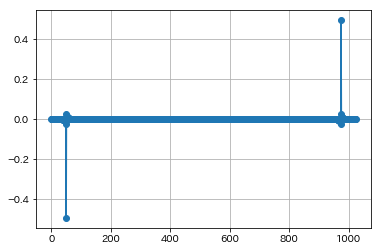

In [16]:
plt.plot(y, 'o-')
#plt.plot(y_p, '.-')
plt.grid()

FFTの結果はだいぶ異なる結果に…。  
ただ、マイナスになっていたり、正規化された結果のようにも見える。

[ndarray-fft](https://github.com/scijs/ndarray-fft)のREADMEに、
* inverse-fftの場合1/Nに正規化されるよ

と書かれているので、N倍にして絶対値を取ってみる。

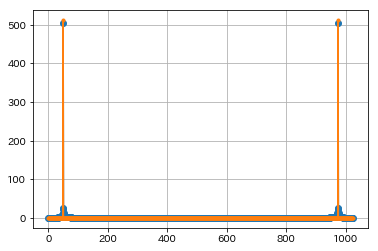

In [14]:
plt.plot(abs(y*1024), 'o-')
plt.plot(y_p, '.-')
plt.grid()

ほぼ同じになることが見て取れた。